In [1]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
plt.style.use('classic')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [2]:
ne = np.load("C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ti255_N_fs.npy")
z = np.load("C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ti255_Z_fs.npy")

In [3]:
ntor = ne.mean(axis=1)
ntt = ntor.mean(axis=1)

In [4]:
dt = 2.3e-7
T = [x*dt for x in range(ne.shape[2])]
N_t = len(T)
T_t = dt*N_t
df_t = 1/T_t
dw_t = 2*np.pi/T_t
freq_t = np.fft.fftfreq(len(T))

In [5]:
rho_i=2.0e-3

In [156]:
dZ = z[90]-z[89]
dZ =0.0056

In [157]:
#dZ = []
#for i in range(z.shape[0]-1):
#    dZ.append(z[i+1]-z[i])
#dZ.append(dZ[-1])

In [158]:
N_z = len(z)
dt_z = dZ
T_z = dt_z*N_z
df_z = 1/T_z
dw_z = 2*np.pi/T_z
freq_z = np.fft.fftfreq(len(z))
#N_z = len(z)
#dt_z = dZ
#T_z = [x*N_z for x in dt_z]
#df_z = [1/x for x in T_z]
#dw_z = [2*np.pi/x for x in T_z]
#freq_z = np.fft.fftfreq(len(z))
#len(freq_z)

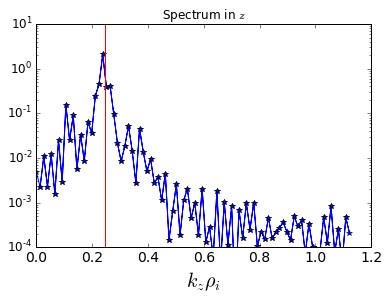

In [163]:
fou_z = np.fft.fft((ntor[:,140]-ntt[:])/np.mean(ntt[:]))
plt.semilogy(abs(freq_z*N_z*dw_z)*rho_i,abs(fou_z)**2,'*-')
#print('kz',abs(freq_z*N_z*dw_z)*rho_i)
plt.axvline(x=0.246,color='r')
plt.ylim(1.0e-4,10)
plt.title(r'Spectrum in $z$')
plt.xlabel(r'$k_z \rho_i$')
plt.show()

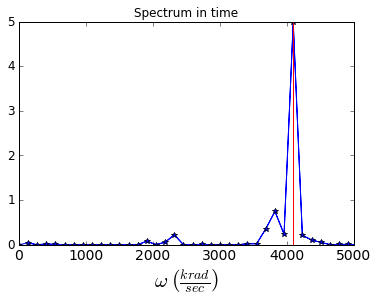

In [166]:
fou_t = np.fft.fft((ntor[85,:]-ntt[85])/np.mean(ntt))
plt.plot(abs(freq_t*N_t*dw_t)/1000,abs(fou_t)**2,'*-')
plt.xlabel(r'$\omega\; \left(\frac{krad}{sec}\right)$')
plt.title(r'Spectrum in time')
#plt.ylim(1.0e35,3.0e40)
plt.xlim(0,5000)
#plt.xlim(72000,78000)
plt.axvline(x=4090,color='r')#651 kHz
#plt.axvline(x=4020,color='b')#640 kHz
plt.show()

In [29]:
X = abs(freq_z*N_z*dw_z)*rho_i
Y = abs(freq_t*N_t*dw_t)/1000
XX,YY = np.meshgrid(X,Y)

In [80]:
F = np.fft.fft2((ntor[:,:]-ntt[:,np.newaxis])/np.mean(ntt))

In [83]:
np.amax(abs(F))

318.3546311079778

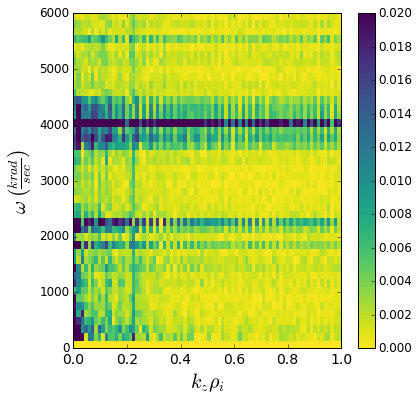

In [165]:
fig, ax = plt.subplots(figsize=(6,6))
#pos = .imshow(abs(F)/1.0e20)
pos=ax.pcolor(XX[:,:],YY[:,:],abs((F).T)/1.0e2,cmap='viridis_r',vmax=0.02)
#ax.set_aspect(1000)
plt.xlim(0,1.0)
plt.ylim(0,6000)
plt.ylabel(r'$\omega\;\left(\frac{krad}{sec}\right)$')
plt.xlabel(r'$k_z \rho_i$')
fig.colorbar(pos)
plt.show()

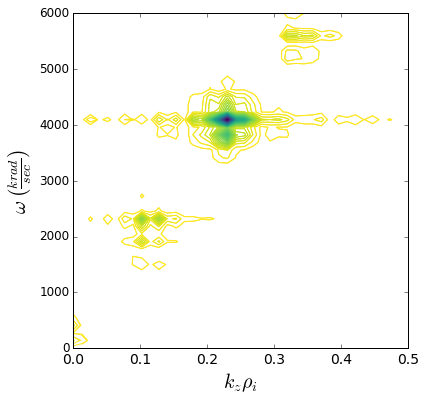

In [164]:
fig, ax = plt.subplots(figsize=(6,6))
#pos = .imshow(abs(F)/1.0e20)
pos=ax.contour(XX[:,:],YY[:,:],abs((F).T),60,cmap='viridis_r')
#ax.set_aspect(1000)
plt.xlim(0,0.5)
plt.ylim(0,6000)
plt.ylabel(r'$\omega \;\left(\frac{krad}{sec}\right)$')
plt.xlabel(r'$k_z \rho_i$')
#fig.colorbar(pos)
plt.show()

In [55]:
dn_ov_n = (ntor[:,:]-ntt[:,np.newaxis])/ntt[:,np.newaxis]

In [58]:
z.shape

(170,)

In [60]:
dn_ov_n.shape

(170, 200)

In [65]:
file = open("dn_nodes.txt",'a')
file.write("dn_ov_n"+"\t"+"Z"+"\t"+"time"+"\n")
for i in range(z.shape[0]):
    for j in range(dn_ov_n.shape[1]):
        file.write(str(dn_ov_n[i,j])+"\t"+str(z[i])+"\t"+str(j)+"\n")
file.close()